In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [112]:
data = pd.read_csv('train.csv')

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       500 non-null    int64  
 1   B       500 non-null    int64  
 2   C       500 non-null    int64  
 3   D       360 non-null    float64
 4   E       253 non-null    float64
 5   F       492 non-null    float64
 6   G       500 non-null    float64
 7   H       500 non-null    int64  
 8   Target  500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [114]:
#Finding the missing values in the dataframe
data.isnull().sum()

A           0
B           0
C           0
D         140
E         247
F           8
G           0
H           0
Target      0
dtype: int64

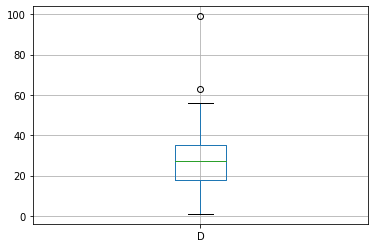

In [115]:
#Checking outliers
data.boxplot(column = 'D')

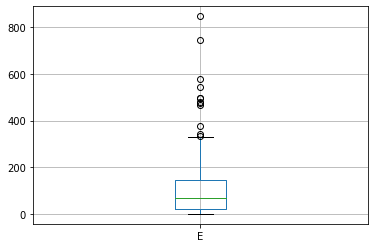

In [116]:
data.boxplot(column = 'E')

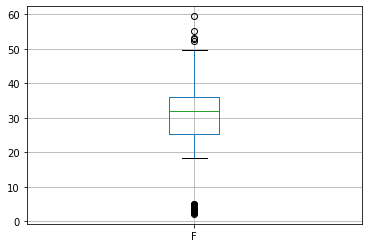

In [117]:
data.boxplot(column = 'F')

In [118]:
data.median()

A           3.000
B         116.000
C          70.000
D          27.000
E          67.000
F          32.000
G           0.378
H          29.000
Target      0.000
dtype: float64

We observed that columns D,E and F had missing values, these columns had outliers so we used Median of the column to impute values.The same was done in test dataset as well

In [119]:
data['D'] = data['D'].fillna((data['D'].median()))

In [120]:
data['E'] = data['E'].fillna((data['E'].median()))

In [121]:
data['F'] = data['F'].fillna((data['F'].median()))

Columns B and C had zero values which we replaced by median values

In [122]:
data.loc[(data["B"] == 0), 'B']= 116.0

In [123]:
data.loc[(data["C"] == 0), 'C']= 70.0

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       500 non-null    int64  
 1   B       500 non-null    float64
 2   C       500 non-null    float64
 3   D       500 non-null    float64
 4   E       500 non-null    float64
 5   F       500 non-null    float64
 6   G       500 non-null    float64
 7   H       500 non-null    int64  
 8   Target  500 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 35.3 KB


In [125]:
data.describe()

,A,B,C,D,E,F,G,H,Target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.876000,122.166000,72.306000,26.502000,86.902000,29.965800,0.472286,33.270000,0.324000
std,3.394653,31.349834,12.359202,11.132739,89.215465,10.542127,0.341394,11.890663,0.468469
min,0.000000,57.000000,30.000000,1.000000,1.000000,2.100000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,66.750000,25.550000,0.240000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,27.000000,67.000000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,32.000000,68.750000,35.900000,0.612250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,72.000000,1.000000


In [126]:
test = pd.read_csv('test.csv')

In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       268 non-null    int64  
 1   B       268 non-null    int64  
 2   C       268 non-null    int64  
 3   D       181 non-null    float64
 4   E       141 non-null    float64
 5   F       265 non-null    float64
 6   G       268 non-null    float64
 7   H       268 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 16.9 KB


In [128]:
test['D'] = test['D'].fillna((test['D'].median()))

In [129]:
test['E'] = test['E'].fillna((test['E'].median()))

In [130]:
test['F'] = test['F'].fillna((test['F'].median()))

In [131]:
test.median()

A      3.0000
B    119.0000
C     72.0000
D     26.0000
E     72.0000
F     31.6000
G      0.3615
H     29.5000
dtype: float64

In [132]:
test.loc[(test["B"] == 0), 'B']= 119.0
test.loc[(test["C"] == 0), 'C']= 72.0

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       268 non-null    int64  
 1   B       268 non-null    float64
 2   C       268 non-null    float64
 3   D       268 non-null    float64
 4   E       268 non-null    float64
 5   F       268 non-null    float64
 6   G       268 non-null    float64
 7   H       268 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 16.9 KB


In [134]:
data.columns.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Target'], dtype=object)

In [135]:
test.columns.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

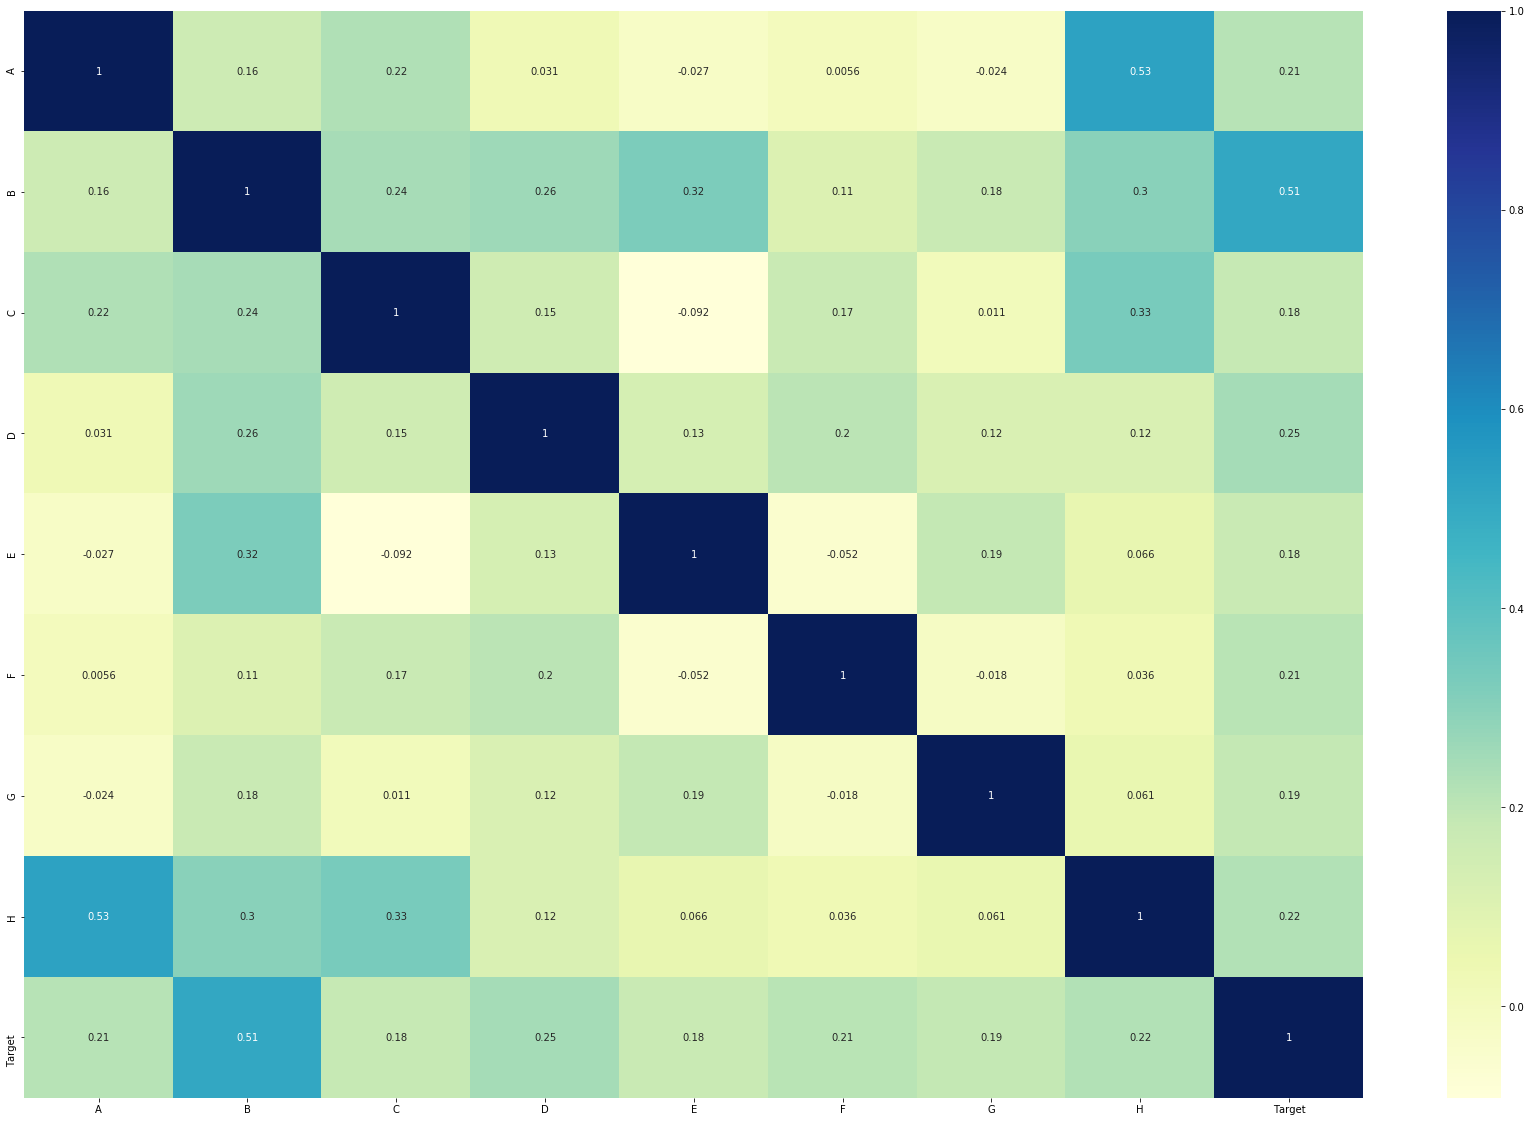

In [136]:
plt.figure(figsize=(30,20)) 
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD0292E7C8>,
      dtype=object)

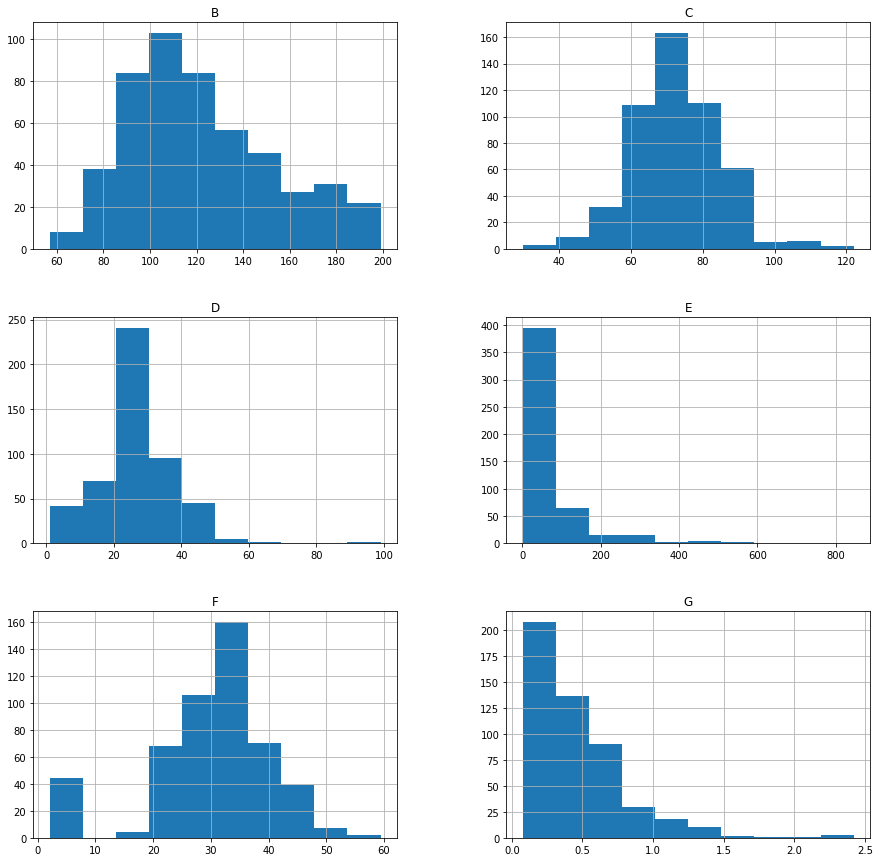

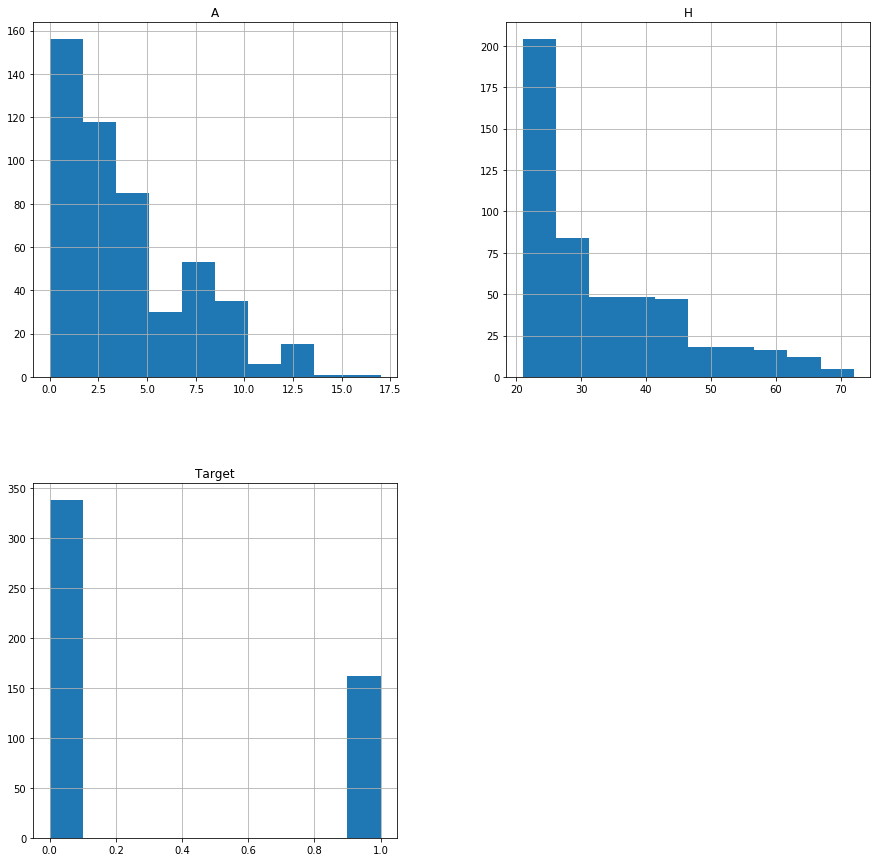

In [137]:
data[data.dtypes[(data.dtypes=="float")].index.values].hist(figsize=[15,15])
data[data.dtypes[(data.dtypes=="int64")].index.values].hist(figsize=[15,15])

In [138]:
X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD7FA96548>,
      dtype=object)

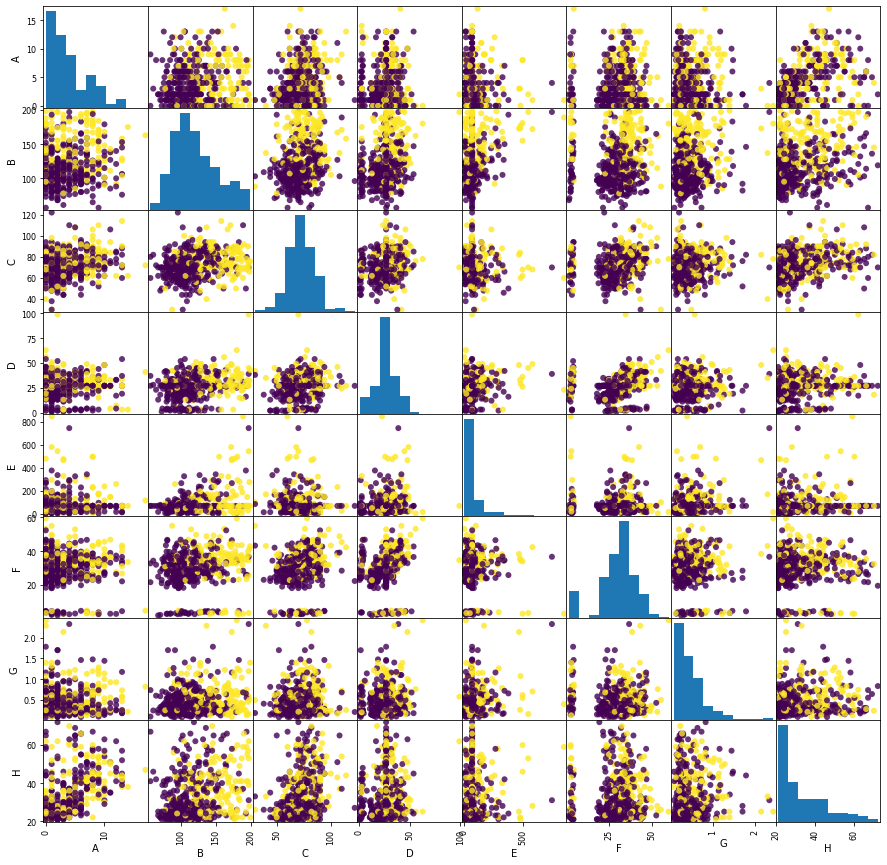

In [139]:
%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = X.columns
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

In [140]:
sc = StandardScaler()
mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

**Naive KNN Classifier**

In [141]:
from sklearn.neighbors import KNeighborsClassifier
X=data.iloc[:,0:8]
y=data.iloc[:,8]

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)
knn=KNeighborsClassifier()   
knn.fit(X_train,y_train)

train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)
test_predict=knn.predict(mat3)
test_predict = pd.DataFrame(test_predict,index=test.index,columns=['Target'])
print('train_score=',train_score)
print('test_score=',test_score)
test_predict

train_score= 0.7893333333333333
test_score= 0.688


,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,1
264,1
265,0
266,0


Observation: Naive KNN classifier gives best validation score of 68 percent.

**KNN Classifier With GridSearch cross validation**

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

# define a list of parameters

param_knn = {'n_neighbors': range(1,15)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=6, return_train_score=True)
grid_knn.fit(X_train, y_train)

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)
print()
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
train_score=grid_knn.score(X_train,y_train)
test_score=grid_knn.score(X_test,y_test)
test_predict_knn=grid_knn.predict(mat3)
test_predict_knn = pd.DataFrame(test_predict_knn,index=test.index,columns=['Target'])
print('KNN_train_score=',train_score)
print('KNN_test_score=',test_score)
test_predict_knn

KNN parameters:  {'n_neighbors': 11}

Best Mean Cross-validation score: 0.76
KNN_train_score= 0.7946666666666666
KNN_test_score= 0.76


,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,1
264,1
265,0
266,0


As we can observe from above KNN with Gridsearch and cross validation=6 with neighbours=11 gives best validation/test score of 76 percent.

**Best K value across validation score**

In [143]:
# search for an optimal value of K for KNN
# list of integers 1 to 15

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)
k_range = range(1, 15)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_test, y_test, cv=6, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6714285714285714, 0.703968253968254, 0.7353174603174604, 0.7674603174603174, 0.7599206349206349, 0.7916666666666666, 0.7682539682539683, 0.7682539682539682, 0.7527777777777778, 0.7924603174603174, 0.7527777777777778, 0.7603174603174603, 0.776984126984127, 0.7603174603174603]


Text(0, 0.5, 'Cross-Validated Accuracy')

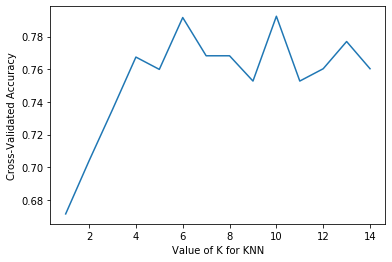

In [144]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

**Naive DecisionTree Classifier**

In [145]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

dtree = DecisionTreeClassifier(max_depth=5,random_state=0)
dtree.fit(X_train, y_train)
train_score=dtree.score(X_train,y_train)
test_score=dtree.score(X_test,y_test)
test_predict=dtree.predict(mat3)
test_predict = pd.DataFrame(test_predict,index=test.index,columns=['Target'])
print('train_score=',train_score)
print('test_score=',test_score)
test_predict

train_score= 0.8373333333333334
test_score= 0.728


,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,0
264,0
265,0
266,0


Observation: Naive Decision Tree classifier gives best validation score of 72.8 percent.

**Decision Tree Classifier With GridSearch cross validation**

In [146]:
# Train a Decision Tree model, the best parameters, and model performance
# find the optimal max_depth

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

#define a list of parameters
param_dtree = {'max_depth': [5,8,11,14,17,20],
              'splitter':["best","random"],
              'criterion':["gini","entropy"]}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=15, return_train_score = True)
grid_dtree.fit(X_train, y_train)

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))

train_score=grid_dtree.score(X_train,y_train)
test_score=grid_dtree.score(X_test,y_test)
test_predict_dtree=grid_dtree.predict(mat3)
test_predict_dtree = pd.DataFrame(test_predict_dtree,index=test.index,columns=['Target'])

# train and test score
print('DTree_train_score=',train_score)
print('Dtree_test_score=',test_score)
test_predict_dtree

Decision Tree parameters:  {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
Best Mean Cross-validation score: 0.78
DTree_train_score= 0.8293333333333334
Dtree_test_score= 0.76


,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,1
264,0
265,0
266,0


We noticed that Decision Tree with Gridsearch and cross validation=15 with criterion as entropy,max_depth as 5,
splitter as random gives best validation/test score of 76 percent.

**Feature Importance with Dtree Classifier**

[0.04808236 0.64189937 0.03723044 0.         0.         0.10905593
 0.06261704 0.10111487]


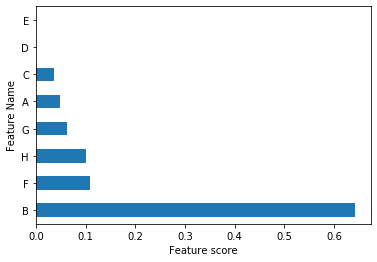

In [147]:
X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.xlabel("Feature score")
plt.ylabel("Feature Name")
plt.show()

Feature B has maximum importance of 0.64189937

**Naive Logistic Regression**

In [148]:
from sklearn.linear_model import LogisticRegression


sc = StandardScaler()
X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

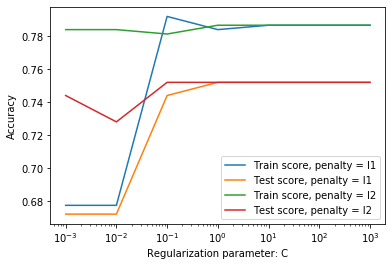

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

As per the Accuracy graph, we can conclude that penalty L2 gave the best validation score.

**Logistic Regression with GridSearch cross validation**

In [150]:
from sklearn.linear_model import LogisticRegression

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

log = LogisticRegression()
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1', 'l2'],'max_iter':[5,10,15,20,25,50,75,100]}


grid_log = GridSearchCV(log, param_log,return_train_score=True,cv=4)
grid_log.fit(X_train, y_train)
print('Logistic parameters: ', grid_log.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_log.best_score_))
train_score=grid_log.score(X_train,y_train)
test_score=grid_log.score(X_test,y_test)
test_predict_lreg=grid_log.predict(mat3)
test_predict_lreg = pd.DataFrame(test_predict_lreg,index=test.index,columns=['Target'])
print('Logreg_train_score=',train_score)
print('Logreg_test_score=',test_score)
test_predict_lreg

Logistic parameters:  {'C': 1, 'max_iter': 5, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.78
Logreg_train_score= 0.7813333333333333
Logreg_test_score= 0.752


,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,1
264,0
265,0
266,0


We observed after multiple iterations of cross validation values, the difference between train and test score is least for cv=4 and validation score remains maximum at 75.2 percent.

**Linear Support Vector Machine Classifier with Gridsearch cross validation**

In [151]:
from sklearn.svm import LinearSVC

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)


svc = LinearSVC()
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'penalty':['l1', 'l2']}
grid_svc = GridSearchCV(svc, param_svc,return_train_score=True)
grid_svc.fit(X_train, y_train)
print('SVC parameters: ', grid_svc.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc.best_score_))
train_score=grid_svc.score(X_train,y_train)
test_score=grid_svc.score(X_test,y_test)
test_predict_lsvc=grid_svc.predict(mat3)
test_predict_lsvc = pd.DataFrame(test_predict_lsvc,index=test.index,columns=['Target'])
print('Linear_SVC_train_score=',train_score)
print('Linear_SVC_test_score=',test_score)
test_predict_lsvc

SVC parameters:  {'C': 0.1, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.78
Linear_SVC_train_score= 0.7813333333333333
Linear_SVC_test_score= 0.752


,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,0
264,0
265,0
266,0


We noticed that Linear Support Vector Machine Classifier with GridsearchCV and cross validation=5 with C as 0.1,penalty as l2 gives best validation/test score of 75.2 percent.

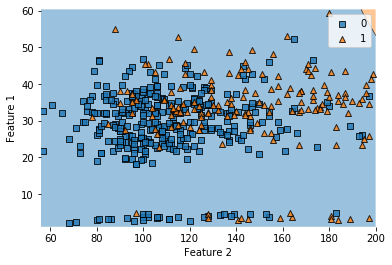

In [153]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC

X=data.iloc[:,[1,5]].values
y=data.iloc[:,8].values
clf = LinearSVC()
clf.fit(X,y)

plot_decision_regions(X, y, clf)
plt.xlabel("Feature 2")
plt.ylabel("Feature 1")
plt.legend()

**Support Vector Classifier with linear kernel and cross validation**

In [154]:
from sklearn.svm import SVC

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

svc = SVC()
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['linear']}
grid_svckl = GridSearchCV(svc, param_svc,return_train_score=True, cv=5)
grid_svckl.fit(X_train, y_train)
print('SVC parameters: ', grid_svckl.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckl.best_score_))
train_score=grid_svckl.score(X_train,y_train)
test_score=grid_svckl.score(X_test,y_test)
test_predict_linearkernel=grid_svckl.predict(mat3)
test_predict_linearkernel = pd.DataFrame(test_predict_linearkernel,index=test.index,columns=['Target'])
print('Linear_kernel_SVC_train_score=',train_score)
print('Linear_kernel_SVC test_score=',test_score)
test_predict_linearkernel

SVC parameters:  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best Mean Cross-validation score: 0.79
Linear_kernel_SVC_train_score= 0.808
Linear_kernel_SVC test_score= 0.768


,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,1
264,0
265,0
266,0


We noticed that Support Vector Machine Classifier with GridsearchCV and cross validation=5 with C as 1,gamma as 0.001, kernel as linear gives best validation/test score of 76.8 percent.

**Support Vector Classifier with polynomial kernel and GridSearch Cross Validation**

In [155]:
from sklearn.svm import SVC

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

svc = SVC()
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['poly']}
grid_svckp = GridSearchCV(svc, param_svc,return_train_score=True,cv=5)
grid_svckp.fit(X_train, y_train)
print('SVC parameters: ', grid_svckp.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckp.best_score_))
train_score=grid_svckp.score(X_train,y_train)
test_score=grid_svckp.score(X_test,y_test)
test_predict_polynomialkernel=grid_svckp.predict(mat3)
test_predict_polynomialkernel = pd.DataFrame(test_predict_polynomialkernel,index=test.index,columns=['Target'])
print('Poly_SVC_train_score=',train_score)
print('Poly_SVC_test _score=',test_score)
test_predict_polynomialkernel

SVC parameters:  {'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
Best Mean Cross-validation score: 0.75
Poly_SVC_train_score= 0.8106666666666666
Poly_SVC_test _score= 0.728


,Target
0,0
1,0
2,0
3,0
4,0
...,...
263,1
264,0
265,0
266,0


We noticed that Support Vector Machine Classifier with GridsearchCV and cross validation=5 with C as 0.001,gamma as 1, kernel as poly gives best validation/test score of 72.8 percent.

**Support Vector Classifier with rbf kernel and Gridsearch Cross Validation**

In [156]:
from sklearn.svm import SVC

X=data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
y=data['Target']

mat1 = sc.fit_transform(X)
mat3 = sc.fit_transform(test)

X_train, X_test, y_train, y_test = train_test_split(mat1,y,test_size=.25,random_state=0)

svc = SVC()
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['rbf']}
grid_svckr = GridSearchCV(svc, param_svc,return_train_score=True,cv=5)
grid_svckr.fit(X_train, y_train)
print('SVC parameters: ', grid_svckr.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckr.best_score_))
train_score=grid_svckr.score(X_train,y_train)
test_score=grid_svckr.score(X_test,y_test)
test_predict_rbfkernel=grid_svckr.predict(mat3)
test_predict_rbfkernel = pd.DataFrame(test_predict_rbfkernel,index=test.index,columns=['Target'])
print('Rbf_SVC_train_score=',train_score)
print('Rbf_SVC_test_score=',test_score)
test_predict_rbfkernel

SVC parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Mean Cross-validation score: 0.79
Rbf_SVC_train_score= 0.8133333333333334
Rbf_SVC_test_score= 0.768


,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,1
264,0
265,0
266,0


We noticed that Support Vector Machine Classifier with GridsearchCV and cross validation=5 with C as 10,gamma as 0.01, kernel as rbf gives best validation/test score of 76.8 percent.

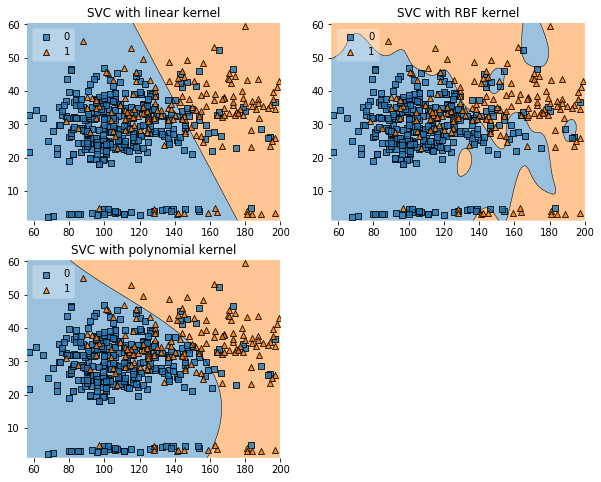

In [157]:
%matplotlib inline

from sklearn.svm import SVC
svc = SVC()

X=data.iloc[:,[1,5]].values
y=data.iloc[:,8].values

C = 10
clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=0.01, C=C)
clf4 = SVC(kernel='poly', degree=3, C=C)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = [
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel']

for clf, lab, grd in zip([clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

Feature B: Index 1 and Feature F:Index 5 were considered for plotting as they had the maximum feature importance score.

**Best Algorithm Selection**

In [158]:
model=["KNN","Decision Tree Classifier","Logistic Regression","Linear SVM","SVM RBF Kernel",
       "SVM Linear Kernel","SVM Poly Kernel"]
X_train_score_accuracy=[grid_knn.score(X_train,y_train),grid_dtree.score(X_train,y_train),grid_log.score(X_train,y_train),
                        grid_svc.score(X_train,y_train),grid_svckr.score(X_train,y_train),grid_svckl.score(X_train,y_train),
                        grid_svckp.score(X_train,y_train)]
X_test_score_accuracy=[grid_knn.score(X_test,y_test),grid_dtree.score(X_test,y_test),grid_log.score(X_test,y_test),
                       grid_svc.score(X_test,y_test),grid_svckr.score(X_test,y_test),grid_svckl.score(X_test,y_test),
                       grid_svckp.score(X_test,y_test)]

gh = {"model":model,"Train Accuracy":X_train_score_accuracy,"Test accuracy":X_test_score_accuracy}

In [159]:
accuracy_score = pd.DataFrame(gh)
accuracy_score.sort_values(by=['Test accuracy'],inplace=True,ascending=False)
accuracy_score

,model,Train Accuracy,Test accuracy
4,SVM RBF Kernel,0.813333,0.768
5,SVM Linear Kernel,0.808000,0.768
0,KNN,0.794667,0.760
1,Decision Tree Classifier,0.829333,0.760
2,Logistic Regression,0.781333,0.752
3,Linear SVM,0.781333,0.752
6,SVM Poly Kernel,0.810667,0.728


The best cross validation score for Support Vector Machine with Kernel RBF and Linear is 79 percent which is the highest amongst all the models.Also, the test score for both the models is same which is 76.8 Percent.Therefore,we can conlcude that the best classification model for our dataset is SVM with Linear Kernel due to below reasons:
1. Both the train and test scores are high
2. The difference between train and test accuracy score is minimum

**Best Classification Model: SVM Linear Kernel**

In [108]:
test_predict_linearkernel.to_csv('Best_classification_model.csv')